In [1]:
!pip install opencv-python tensorflow tensorflow-hub


In [2]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
# Load pre-trained object detection model
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

In [4]:
# Load image
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = tf.image.resize(img, (320, 320)) / 255.0
    return img, tf.expand_dims(tf.cast(img_resized * 255, tf.uint8), axis=0)

In [5]:
original_img, input_tensor = load_image('dog_bike_car.jpg')

In [6]:
# Run detection
result = model(input_tensor)
result = {key: value.numpy() for key, value in result.items()}

In [7]:
# Fallback for COCO labels (hardcoded 90 classes)
coco_labels = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window',
    'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

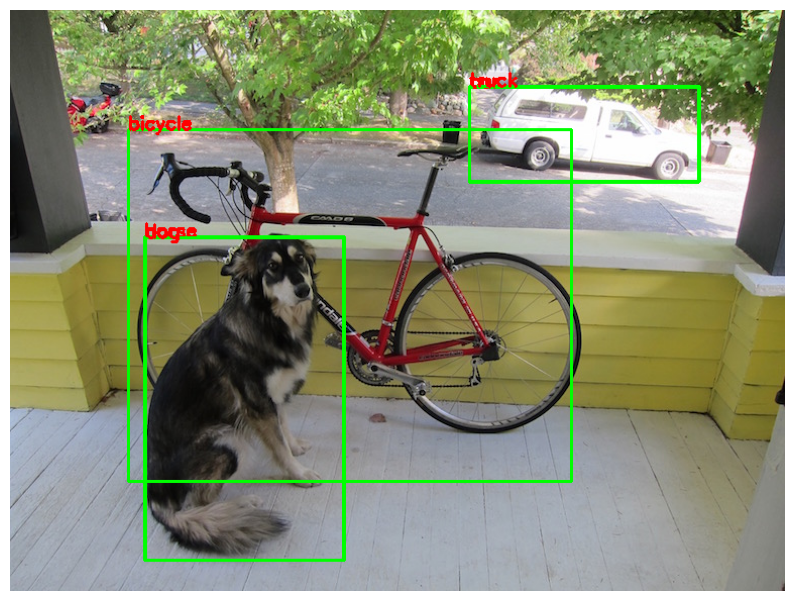

In [16]:
# Drawing function
def draw_boxes(img, boxes, classes, scores, threshold=0.5):
    for i in range(len(boxes)):
        if scores[i] > threshold:
            box = boxes[i]  # Get the i-th bounding box which is a [y1, x1, y2, x2] array
            y1, x1, y2, x2 = box

            start = (int(x1 * img.shape[1]), int(y1 * img.shape[0]))
            end = (int(x2 * img.shape[1]), int(y2 * img.shape[0]))
            label = coco_labels[int(classes[i]) - 1]  # Use coco_labels here
            cv2.rectangle(img, start, end, (0, 255, 0), 2)
            cv2.putText(img, label, start, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Final call
draw_boxes(
    original_img,
    result["detection_boxes"][0],  # Access the bounding boxes for the first (and only) image in the batch
    result["detection_classes"][0],  # Access the classes for the first image
    result["detection_scores"][0]   # Access the scores for the first image
)